# **Portfolio Analysis**
 #### **NOTE (Tuesday 20 February 2024):**
 This project is redundant. A more recent, more reader-friendly and improved version can be found at `portfolio-optimizer.ipynb`. This project will still be kept for the sake of completeness.

## **Table of Contents**
1. [Purpose](#Purpose)
2. [Preliminaries](#Preliminaries)
   * [Importing the Python Modules of Interest](#Importing-the-Python-Modules-of-Interest)
   * [Identifying the Data of Interest](#Identifying-the-Data-of-Interest)
   * [Defining the Variables and Functions of Interest](#Defining-the-Variables-and-Functions-of-Interest)
3. [Results](#Results)
   * [Porfolio Analysis](#Portfolio-Analysis)
   * [Efficient Frontier](#Efficient-Frotier)
4. [Credits](#Credits)

## **1. Purpose** <a class="anchor" id="chapter_1"></a>
The purpose of this project is twofold and the following is sought to be achieved:
    <ol>
    <li>To define a function $\mathrm{PortfolioAnalysis}$ that, given the following inputs:
    <ul>
    <li>
    $\mathbf{\vec{S}}$, a mandatory input denoting a `list` object representing a list of tickers denoting assets in portfolio;
    </li>
    <li>
    $t_{0}$, a mandatory input denoting a `datetime.datetime` object representing a start date;
    </li>
    <li>
    $t_{1}$, a mandatory input denoting a `datetime.datetime` object representing an end date;
    </li>
    <li>
    $\omega_{=}$, an optional input denoting a `bool` object representing whether or not the portfolio is equally weighted;
    <li>
     $V$, an optional input denoting a `bool` object representing whether or not the daily closing prices of the assets, as well as their daily closing rates of returns and their overall correlation matrix, are plotted, and;
    </li>
    <li>
     $\LaTeX$, an optional input denoting a `bool` object representing whether or not the functions outputs are displayed in $\LaTeX$ format,
    </li>
    </ul>
    returns the following outputs:
    <ul>
    <li>
    $\mathbf{\vec{\omega}}$, an output denoting a `numpy.ndarray` object representing the vector of weights of the given portfolio;
    </li>
    <li>
    $\mathbf{\vec{\mu}}$, an output denoting a `pandas.core.series.Series` object representing the vector of expected daily returns of the given portfolio;
    </li>
    <li>
    $\mathbf{\Sigma}$, an output denoting a `pandas.core.frame.DataFrame` object representing the covariance matrix of daily returns of the given portfolio;
    </li>
    <li>
    $\mathbf{\rho}$, an output denoting a `pandas.core.frame.DataFrame` object representing the correlation matrix of daily returns of the given portfolio;
    </li>
    <li>
    $r_{\mathrm{P\text{-}A}}$, an output denoting a `numpy.float64` object representing the annualized expected daily return of the given portfolio;
    </li>
    <li>
    $\sigma_{\mathrm{P\text{-}A}}$, an output denoting a `numpy.float64` object representing the annualized volatility of the given portfolio;
    </li>
    <li>
    $\mathrm{Sharpe}_{\mathrm{P\text{-}A}}$, an output denoting a `numpy.float64` object representing the annualized Sharpe ratio of the given portfolio. 
    </li>
    </ul>
    </li>
    <li>To define a function $\mathrm{EfficientFrontier}$ that, given the following inputs:
    <ul>
    <li>
    $\mathbf{\vec{S}}$, a mandatory input denoting a `list` object representing a list of tickers denoting assets in portfolio;
    </li>
    <li>
    $t_{0}$, a mandatory input denoting a `datetime.datetime` object representing a start date;
    </li>
    <li>
    $t_{1}$, a mandatory input denoting a `datetime.datetime` object representing an end date;
    </li>
    <li>
    $S_{\mathrm{C}}$, an optional input denoting a `tuple` object representing the bounds of the portfolio weights when constructing the efficient frontier;
    <li>
     $V$, an optional input denoting a `bool` object representing whether or not the daily closing prices of the assets, as well as their daily closing rates of returns and their overall correlation matrix, are plotted, and;
    </li>
    <li>
     $\LaTeX$, an optional input denoting a `bool` object representing whether or not the functions outputs are displayed in $\LaTeX$ format,
    </li>
    </ul>
    returns the following outputs:
    <ul>
    <li>
    $\mathbf{\vec{\omega}}_{\mathrm{min}\text{-}\sigma}$, an output denoting a `numpy.ndarray` object representing the vector of weights of the minimum volatility portfolio;
    </li>
    <li>
    $\mu_{\mathrm{min}\text{-}\sigma}$, an output denoting a `numpy.float64` object representing the annualized minimum volatility portfolio expected return;
    </li>
    <li>
    $\sigma_{\mathrm{min}\text{-}\sigma}$, an output denoting a `numpy.float64` object representing the annualized minimum volatility portfolio volatility;
    </li>
    <li>
    $\mathrm{Sharpe}_{\mathrm{min}\text{-}\sigma}$, an output denoting a `numpy.float64` object representing the annualized minimum volatility portfolio Sharpe ratio;
    </li>
    <li>
    $\mathbf{\vec{\omega}}_{\mathrm{max}\text{-}\mathrm{Sharpe}}$, an output denoting a `numpy.ndarray` object representing the vector of weights of the maximum Sharpe ratio portfolio;
    </li>
    <li>
    $\mu_{\mathrm{max}\text{-}\mathrm{Sharpe}}$, an output denoting a `numpy.float64` object representing the annualized maximum Sharpe ratio portfolio expected return;
    </li>
    <li>
    $\sigma_{\mathrm{max}\text{-}\mathrm{Sharpe}}$, an output denoting a `numpy.float64` object representing the annualized maximum Sharpe ratio portfolio volatility;
    </li>
    <li>
    $\mathrm{Sharpe}_{\mathrm{max}\text{-}\mathrm{Sharpe}}$, an output denoting a `numpy.float64` object representing the annualized maximum Sharpe ratio portfolio Sharpe ratio;
    </li>
    </ul>
    </li>
    </ol>
    In symbols:
    $$\mathrm{PortfolioAnalysis}\left(\mathbf{\vec{S}},t_{0},t_{1};\omega_{=},V,\mathrm{\LaTeX}\right) = \left(\mathbf{\vec{\omega}},\mathbf{\vec{\mu}},\mathbf{\Sigma},\mathbf{\rho},r_{\mathrm{P\text{-}A}},\sigma_{\mathrm{P\text{-}A}},\mathrm{Sharpe}_{\mathrm{P\text{-}A}}\right)$$
    $$\mathrm{EfficientFrontier}\left(\mathbf{\vec{S}},t_{0},t_{1};S_{\mathrm{C}},V,\mathrm{\LaTeX}\right) = \left(\mathbf{\vec{\omega}}_{\mathrm{min}\text{-}\sigma},\mu_{\mathrm{min}\text{-}\sigma},\sigma_{\mathrm{min}\text{-}\sigma},\mathrm{Sharpe}_{\mathrm{min}\text{-}\sigma},\mathbf{\vec{\omega}}_{\mathrm{max}\text{-}\mathrm{Sharpe}},\mu_{\mathrm{max}\text{-}\mathrm{Sharpe}},\sigma_{\mathrm{max}\text{-}\mathrm{Sharpe}},\mathrm{Sharpe}_{\mathrm{max}\text{-}\mathrm{Sharpe}}\right)$$

## **2. Preliminaries** <a class = "anchor" id = "chapter_2"></a>
* ### Importing the Python Modules of Interest <a class = "anchor" id = "section_2_1"></a>
In this project, the following Python modules are imported and used: `numpy`, `sympy`, `pandas`, `datetime`, `scipy.optimize`, `yfinance`, `pandas_datareader`, `seaborn`, `matplotlib.pyplot`, `plotly.graph_objects` and `IPython.display`.

In [1]:
# Import All Python Modules Of Interest
import numpy as np                  # For Numerical Calculations
import sympy as sp                  # For Working With Symbolic Mathematical Expressions
import pandas as pd                 # For Data Manipulations
import seaborn as sns               # For Data Visualizations
import matplotlib.pyplot as plt     # For Data Visualizations
import plotly.graph_objects as go   # For Interactive Data Visualizations
import datetime as dt               # For Working With Dates And Times
import scipy.optimize as sc         # For Implementing Optimization Algorithms
import yfinance as yf               # For Accessing Financial Data From The Web
import pandas_datareader as pdr     # For Accessing Financial Data From The Web
import IPython.display as ip        # For Displaying Rich LaTeX Content

# Specify Display Parameters
sp.init_printing(use_latex = "mathjax", use_unicode = True)
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

* ### Identifying the Data of Interest <a class = "anchor" id = "section_2_2"></a>
Moreover, in this project, data on the daily closing prices (in USD) of twelve cryptocurrencies ranging over the past two years until the present moment are analyzed. In particular, the cryptocurrencies of interest are:
<ul>
<li>Bitcoin (BTC)</li>
<li>Ethereum (ETH)</li>
<li>Cardano (ADA)</li>
<li>Dogecoin (DOGE)</li>
<li>Solana (SOL)</li>
<li>Binance Coin (BNB)</li>
<li>TRON (TRX)</li>
<li>Shiba Inu (SHIB)</li>
<li>XRP (XRP)</li>
<li>Polkadot (DOT)</li>
<li>Litecoin (LTC)</li>
<li>UNUS SED LEO (LEO)</li>
</ul>

The data of interest are provided by Yahoo Finance (<href>https://finance.yahoo.com</href>) and is imported by using the `.download` method from the `yfinance` Python module.

In [2]:
# Identify The Data Of Interest
currency = "USD"
stocklist = ["BTC", "ADA", "DOGE", "ETH", "BNB", "SOL", "DOT", "LTC", "LEO", "XRP", "TRX", "SHIB"]
stocks = [stock + "-" + currency for stock in stocklist]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = int(365.25*2))
stock_data = yf.download(stocks, start = start_date, end = end_date)

[*********************100%***********************]  12 of 12 completed


* ### Defining the Functions of Interest <a class = "anchor" id = "section_2_3"></a>
The principal objective of this project is to define two functions, `portfolio_analysis` and `efficient_frontier`, which perform the tasks described in <a class = "anchor" id = "Chapter_1">Section 1</a>. In order to define the function `efficient_frontier` successfully, however, it is necessary to define four other functions that will be optimized in order to construct the efficient frontier. These are the functions `function_annualized_portfolio_expected_return`, `function_annualized_portfolio_volatility`, `function_annualized_negative_Sharpe_ratio` and `efficient_optimization`, defined in the code cell below. The Sequential Least-Squares Problem optimization method was used.

In [3]:
# Define The function_annualized_portfolio_expected_return Function
def function_annualized_portfolio_expected_return(weights, expected_returns, covariance_returns):
    return np.dot(weights, expected_returns) * 252

# Define The function_annualized_portfolio_volatility Function
def function_annualized_portfolio_volatility(weights, expected_returns, covariance_returns):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_returns, weights))) * np.sqrt(252)

# Define The function_annualized_portfolio_negative_Sharpe_ratio Function
def function_annualized_negative_Sharpe_ratio(weights, expected_returns, covariance_returns, risk_free_interest_rate = 0):
    annualized_portfolio_expected_return = np.dot(weights, expected_returns) * 252
    annualized_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_returns, weights))) * np.sqrt(252)
    return - (annualized_portfolio_expected_return - risk_free_interest_rate)/annualized_portfolio_volatility

#Define The efficient_optimization Function
def efficient_optimization(expected_returns, covariance_returns, target_return, constraint_set = (0,1)):
    """Given a target rate of return, determine the weights of the portfolio with the least volatility whose expected rate of return is above or equal to the target rate of return"""
    num_assets = len(expected_returns)
    args = (expected_returns, covariance_returns)
    constraints = ({"type":"eq", "fun": lambda x : function_annualized_portfolio_expected_return(x, expected_returns, covariance_returns) - target_return},
                   {"type":"eq", "fun": lambda x : np.sum(x) - 1})
    bound = constraint_set
    bounds = tuple(constraint_set for asset in range(num_assets))
    efficient_optimization_result = sc.minimize(function_annualized_portfolio_volatility, num_assets*[1./num_assets], args = args, method = "SLSQP", bounds = bounds, constraints = constraints)
    return efficient_optimization_result

## **3. Results** <a class = "anchor" id = "chapter_3"></a>
* ### Portfolio Analysis <a class = "anchor" id = "section_3_1"></a>
The `portfolio_analysis` function is defined in the code cell below.

In [4]:
# Define The portfolio_analysis Function
def portfolio_analysis(stocks, start, end, equal_weighted = True, visuals = True, LaTeX = True):
    """Returns The Standard Metrics Of A Portfolio."""
    # Specify The Number Of Decimal Places To Which The Results Should Be Rounded
    decimal_places = input("Up to how many decimal places would you like your results to be rounded?")
    try:
        decimal_places = int(decimal_places)
    except:
        raise TypeError("The number of decimal places has not been entered correctly. Please enter a natural number.")
    
    # Specify The Portfolio Weights
    if equal_weighted:
        weights = np.array([1]*len(stocks))/len(stocks)
    else:
        try:
            weights = input("Enter " + str(len(stocks)) + " comma-separated weights as decimals:").split(",")
            if len(weights) !=  len(stocks):
                raise ValueError("There are not as many weights as stocks. Please enter as many weights as there are stocks.")
            else:
                weights = np.array([float(x) for x in weights])
                if any(w < 0 or w > 1 for w in weights):
                    raise ValueError("Not all weights are between 0 and 1. Please enter only real numbers between 0 and 1, inclusive, whose sum is equal to 1.")
                elif np.sum(weights) !=  1:
                    raise ValueError("The weights do not sum up to 1. Please enter only real numbers between 0 and 1, inclusive, whose sum is equal to 1.")
        except:
            raise ValueError("Not all weights have been entered correctly. Please enter only real numbers between 0 and 1, inclusive, whose sum is equal to 1.")
    
    # Specify The Risk-Free Interest Rate
    risk_free_interest_rate = input("Enter the risk free interest rate:")
    try:
        risk_free_interest_rate = np.float64(risk_free_interest_rate)
    except:
        raise TypeError("The risk-free interest rate has not been entered correctly. Please enter a positive real number.")
    
    # Retrieve The Data Of Interest And Calculate The Assets' And Portfolio's Standard Metrics 
    stocks.sort()
    stock_data = yf.download(stocks, start = start, end = end)
    prices = stock_data["Close"]
    returns = prices.pct_change()
    expected_returns = returns.mean()
    covariance_returns = returns.cov()
    correlation_returns = returns.corr()
    annualized_portfolio_expected_return = np.dot(weights, expected_returns) * 252
    annualized_portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_returns, weights))) * np.sqrt(252)
    annualized_portfolio_Sharpe_ratio = (annualized_portfolio_expected_return-risk_free_interest_rate)/annualized_portfolio_volatility
    
    # Print The Portfolio's Standard Metrics
    print("Assets: " + str(stocks))
    print("Start Date: " + str(start.strftime("%d %B %Y")) + ", " + str(start.strftime("%H:%M:%S")))
    print("End Date: " + str(end.strftime("%d %B %Y")) + ", " + str(end.strftime("%H:%M:%S")))
    if LaTeX:
        print("Risk-Free Interest Rate:")
        display(ip.Math(r'r'rf'\approx {sp.latex(risk_free_interest_rate.round(decimal_places))}'))
        print("Weights:")
        display(ip.Math(r'\mathbf{\vec{\omega}}'rf'\approx {sp.latex(sp.Matrix(weights.round(decimal_places)))}'))
        print("Expected Returns:")
        display(ip.Math(r'\mathbf{\vec{\mu}}'rf'\approx {sp.latex(sp.Matrix(expected_returns.round(decimal_places)))}')) 
        print("Covariance of Returns:")
        display(ip.Math(r'\mathbf{\Sigma}'rf'\approx {sp.latex(sp.Matrix(covariance_returns.round(decimal_places)))}')) 
        print("Correlation of Returns:")
        display(ip.Math(r'\rho'rf'\approx {sp.latex(sp.Matrix(correlation_returns.round(decimal_places)))}')) 
        print("Annualized Portfolio Expected Return:")
        display(ip.Math(r'r_{\mathrm{P\text{-}A}}'rf'\approx {sp.latex(annualized_portfolio_expected_return.round(decimal_places))}')) 
        print("Annualized Portfolio Volatility:")
        display(ip.Math(r'\sigma_{\mathrm{P\text{-}A}}'rf'\approx {sp.latex(annualized_portfolio_volatility.round(decimal_places))}')) 
        print("Annualized Portfolio Sharpe ratio:")
        display(ip.Math(r'\mathrm{Sharpe}_{\mathrm{P\text{-}A}}'rf'\approx {sp.latex(annualized_portfolio_Sharpe_ratio.round(decimal_places))}')) 
    else:
        print("Risk-Free Interest Rate: " + str(risk_free_interest_rate.round(decimal_places)))
        print("Weights: " + str(weights.round(decimal_places)))
        print("Expected Returns:", expected_returns.round(decimal_places))
        print("Covariance of Returns:", covariance_returns.round(decimal_places))
        print("Correlation of Returns:", correlation_returns.round(decimal_places))
        print("Annualized Portfolio Expected Return: " + str(round(annualized_portfolio_expected_return,decimal_places)))
        print("Annualized Portfolio Volatility: " + str(round(annualized_portfolio_volatility,decimal_places)))
        print("Annualized Portfolio Sharpe ratio: " + str(round(annualized_portfolio_Sharpe_ratio,decimal_places)))
    
    # Display Plots Of The Asset Prices, Their Returns and Correlations
    if visuals:
        prices.plot(title = "Daily Closing Cryptocurrency Prices from " + str(start.strftime("%d %B %Y")) + " to " + str(end.strftime("%d %B %Y")), xlabel = "Date", ylabel = "Closing Price (in USD)")
        plt.yscale("log")
        plt.subplot(111).legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 2, fancybox = True, shadow = True)
        returns.plot(title = "Daily Closing Cryptocurrency Rates of Return from " + str(start.strftime("%d %B %Y")) + " to " + str(end.strftime("%d %B %Y")), xlabel = "Date", ylabel = "Rate of Return")
        plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 2, fancybox = True, shadow = True)
        plt.show()
        sns.heatmap(correlation_returns, annot = True, cmap = "coolwarm").set(title = "Correlations of Daily Closing Cryptocurrency Rates of Return from " + str(start.strftime("%d %B %Y")) + " to " + str(end.strftime("%d %B %Y")))
    
    # Return The Portfolio's Standard Metrics
    return weights, expected_returns, covariance_returns, correlation_returns, annualized_portfolio_expected_return, annualized_portfolio_volatility, annualized_portfolio_Sharpe_ratio

The function `portfolio_analysis` is executed in the code cell below.

[*********************100%***********************]  12 of 12 completed
Assets: ['ADA-USD', 'BNB-USD', 'BTC-USD', 'DOGE-USD', 'DOT-USD', 'ETH-USD', 'LEO-USD', 'LTC-USD', 'SHIB-USD', 'SOL-USD', 'TRX-USD', 'XRP-USD']
Start Date: 19 August 2021, 00:18:10
End Date: 19 August 2023, 00:18:10
Risk-Free Interest Rate:


<IPython.core.display.Math object>

Weights:


<IPython.core.display.Math object>

Expected Returns:


<IPython.core.display.Math object>

Covariance of Returns:


<IPython.core.display.Math object>

Correlation of Returns:


<IPython.core.display.Math object>

Annualized Portfolio Expected Return:


<IPython.core.display.Math object>

Annualized Portfolio Volatility:


<IPython.core.display.Math object>

Annualized Portfolio Sharpe ratio:


<IPython.core.display.Math object>

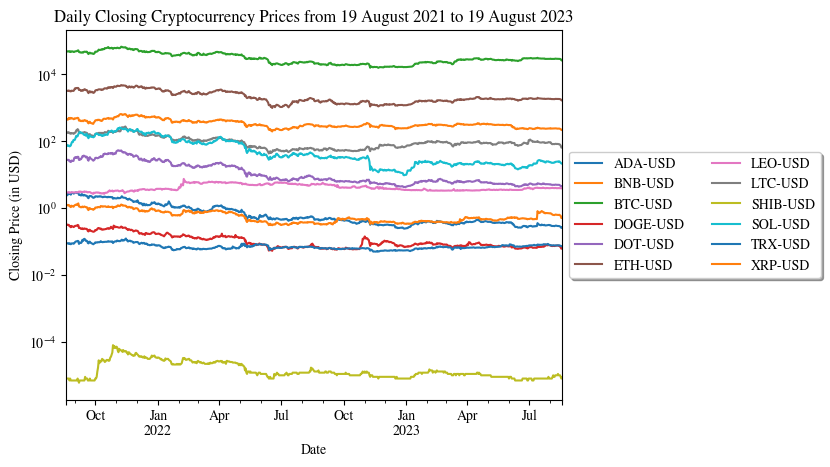

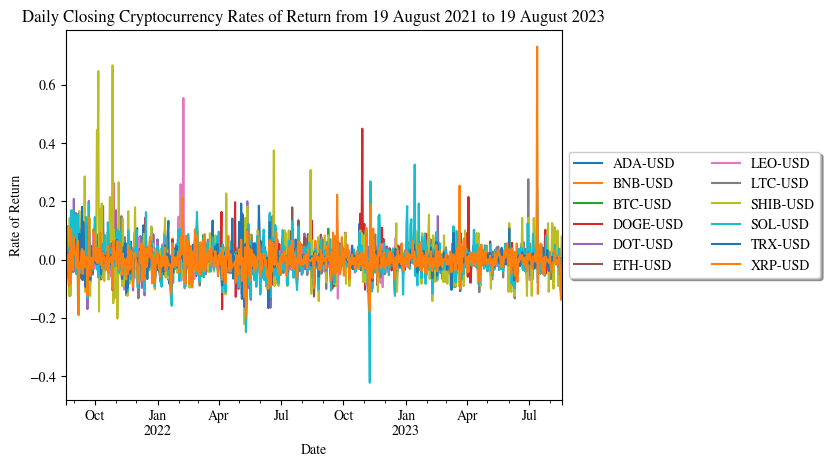

(array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333]),
 ADA-USD    -0.002058
 BNB-USD    -0.000317
 BTC-USD    -0.000320
 DOGE-USD   -0.001013
 DOT-USD    -0.001299
 ETH-USD    -0.000114
 LEO-USD     0.000921
 LTC-USD    -0.000383
 SHIB-USD    0.002633
 SOL-USD     0.000087
 TRX-USD     0.000353
 XRP-USD    -0.000103
 dtype: float64,
            ADA-USD   BNB-USD   BTC-USD  DOGE-USD   DOT-USD   ETH-USD  \
 ADA-USD   0.001967  0.001123  0.001013  0.001398  0.001587  0.001319   
 BNB-USD   0.001123  0.001236  0.000842  0.001113  0.001275  0.001108   
 BTC-USD   0.001013  0.000842  0.000953  0.000987  0.001099  0.001057   
 DOGE-USD  0.001398  0.001113  0.000987  0.002445  0.001455  0.001311   
 DOT-USD   0.001587  0.001275  0.001099  0.001455  0.002241  0.001468   
 ETH-USD   0.001319  0.001108  0.001057  0.001311  0.001468  0.001540   
 LEO-USD   0.000243  0.000154  0.00019

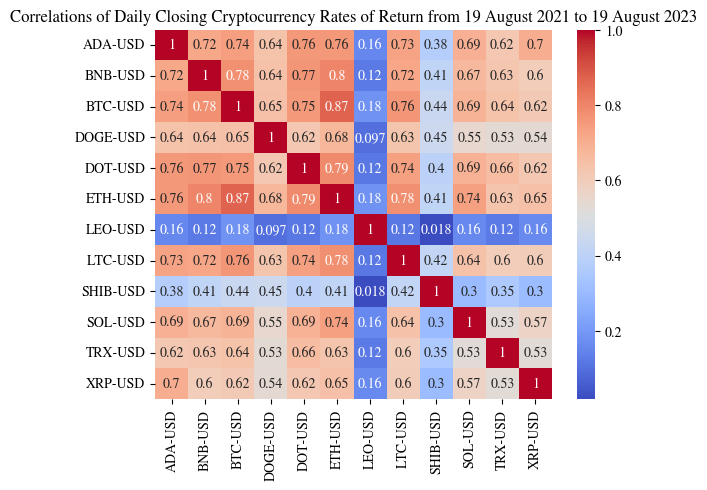

In [5]:
# Execute the Portfolio Analysis Function
portfolio_analysis(stocks, start_date, end_date)

In [6]:
stocks.sort()
stock_data = yf.download(stocks, start = start_date, end = end_date)
prices = stock_data["Close"]
returns = prices.pct_change()

[*********************100%***********************]  12 of 12 completed


* ### Efficient Frontier <a class = "anchor" id = "section_3_2"></a>

The function `efficient_frontier` is defined in the code cell below.

In [7]:
# Define The efficient_frontier Function
def efficient_frontier(stocks, start, end, constraint_set = (0,1), visuals = True, LaTeX = True):
    """Construct the Maximum Sharpe Ratio and Minimum Volatility Portfolios, Calculate Their Standard Metrics And Plot The Efficient Frontier"""
    # Specify The Number Of Decimal Places To Which The Results Should Be Rounded
    decimal_places = input("Up to how many decimal places would you like your results to be rounded?")
    try:
        decimal_places = int(decimal_places)
    except:
        raise TypeError("The number of decimal places has not been entered correctly. Please enter a natural number.")
    
    # Specify The Risk-Free Interest Rate
    risk_free_interest_rate = input("Enter the risk free interest rate:")
    try:
        risk_free_interest_rate = np.float64(risk_free_interest_rate)
    except:
        raise TypeError("The risk-free interest rate has not been entered correctly. Please enter a positive real number.")
    
    # Retrieve The Data Of Interest And Calculate The Assets' Standard Metrics 
    stocks.sort()
    stock_data = yf.download(stocks, start = start, end = end)
    prices = stock_data["Close"]
    returns = prices.pct_change()
    expected_returns = returns.mean()
    covariance_returns = returns.cov()
    correlation_returns = returns.corr()
    
    # Set The Constraints and Bounds For The Optimizations
    num_assets = len(stocks)
    constraints = ({"type":"eq", "fun": lambda x: np.sum(x) - 1})
    bound = constraint_set
    bounds = tuple(bound for asset in range(num_assets))

    # Construct The Maximum Sharpe Ratio Portfolio And Calculate Its Standard Metrics
    args_maximum_Sharpe_ratio = (expected_returns, covariance_returns, risk_free_interest_rate)
    maximum_Sharpe_ratio_portfolio = sc.minimize(function_annualized_negative_Sharpe_ratio, num_assets * [1./num_assets], args = args_maximum_Sharpe_ratio, method = "SLSQP", bounds = bounds, constraints = constraints)
    maximum_Sharpe_ratio_portfolio_weights = maximum_Sharpe_ratio_portfolio["x"]
    maximum_Sharpe_ratio_portfolio_allocation = pd.DataFrame(maximum_Sharpe_ratio_portfolio_weights, index = expected_returns.index, columns = ["Allocation"])
    maximum_Sharpe_ratio_portfolio_allocation.Allocation = [round(x*100,2) for x in maximum_Sharpe_ratio_portfolio_allocation.Allocation]
    annualized_maximum_Sharpe_ratio_portfolio_expected_return = np.dot(maximum_Sharpe_ratio_portfolio_weights, expected_returns) * 252
    annualized_maximum_Sharpe_ratio_portfolio_volatility = np.sqrt(np.dot(maximum_Sharpe_ratio_portfolio_weights.T, np.dot(covariance_returns, maximum_Sharpe_ratio_portfolio_weights))) * np.sqrt(252)
    annualized_maximum_Sharpe_ratio_portfolio_Sharpe_ratio = (annualized_maximum_Sharpe_ratio_portfolio_expected_return-risk_free_interest_rate)/annualized_maximum_Sharpe_ratio_portfolio_volatility
    
    # Construct the Minimum Volatility Portfolio And Calculate Its Standard Metrics
    args_minimum_volatility = (expected_returns, covariance_returns)
    minimum_volatility_portfolio = sc.minimize(function_annualized_portfolio_volatility, num_assets * [1./num_assets], args = args_minimum_volatility, method = "SLSQP", bounds = bounds, constraints = constraints)
    minimum_volatility_portfolio_weights = minimum_volatility_portfolio["x"]
    minimum_volatility_allocation = pd.DataFrame(minimum_volatility_portfolio_weights, index = expected_returns.index, columns = ["Allocation"])
    minimum_volatility_allocation.Allocation = [round(x*100,2) for x in minimum_volatility_allocation.Allocation]
    annualized_minimum_volatility_portfolio_expected_return = np.dot(minimum_volatility_portfolio_weights, expected_returns) * 252
    annualized_minimum_volatility_portfolio_volatility = np.sqrt(np.dot(minimum_volatility_portfolio_weights.T, np.dot(covariance_returns, minimum_volatility_portfolio_weights))) * np.sqrt(252)
    annualized_minimum_volatility_portfolio_Sharpe_ratio = (annualized_minimum_volatility_portfolio_expected_return-risk_free_interest_rate)/annualized_minimum_volatility_portfolio_volatility
    
    # Construct The Efficient Frontier
    efficient_list = []
    target_returns = np.linspace(annualized_minimum_volatility_portfolio_expected_return,annualized_maximum_Sharpe_ratio_portfolio_expected_return, 25)
    for target_return in target_returns:
        efficient_list.append(efficient_optimization(expected_returns, covariance_returns, target_return)["fun"])
    
    # Plot The Maximum Sharpe Ratio Portfolio On The Efficient Frontier
    maximum_Sharpe_ratio_plot = go.Scatter(name = "Maximum Sharpe Ratio", mode = "markers", x = [100*annualized_maximum_Sharpe_ratio_portfolio_volatility], y = [100*annualized_maximum_Sharpe_ratio_portfolio_expected_return], marker = dict(color = "red", size = 14, line = dict(width = 3, color = "black")))

    # Plot The Minimum Volatility Portfolio On The Efficient Frontier
    minimum_volatility_plot = go.Scatter(name = "Minimum Volatility", mode = "markers", x = [100*annualized_minimum_volatility_portfolio_volatility], y = [100*annualized_minimum_volatility_portfolio_expected_return], marker = dict(color = "green", size = 14, line = dict(width = 3, color = "black")))

    # Plot The Efficient Frontier
    efficient_frontier_plot = go.Scatter(name = "Efficient Frontier", mode = "lines", x = [round(100*x,2) for x in efficient_list], y = [round(100*y,2) for y in target_returns], line = dict(color = "black", width = 4, dash = "dashdot"))

    # Print The Calculated Standard Metrics
    print("Assets: " + str(stocks))
    print("Start Date: " + str(start.strftime("%d %B %Y")) + ", " + str(start.strftime("%H:%M:%S")))
    print("End Date: " + str(end.strftime("%d %B %Y")) + ", " + str(end.strftime("%H:%M:%S")))
    if LaTeX:
        print("Risk-Free Interest Rate:")
        display(ip.Math(r'r'rf'\approx {sp.latex(risk_free_interest_rate.round(decimal_places))}'))
        print("Maximum Sharpe ratio Portfolio Weights:")
        display(ip.Math(r'\mathbf{\vec{\omega}}_{\mathrm{max}\text{-}\mathrm{Sharpe}}'rf'\approx {sp.latex(sp.Matrix(maximum_Sharpe_ratio_portfolio_weights.round(decimal_places)))}'))
        print("Annualized Maximum Sharpe ratio Portfolio Expected Return:")
        display(ip.Math(r'\mu_{\mathrm{max}\text{-}\mathrm{Sharpe}}'rf'\approx {sp.latex(annualized_maximum_Sharpe_ratio_portfolio_expected_return.round(decimal_places))}'))
        print("Annualized Maximum Sharpe ratio Portfolio Volatility:")
        display(ip.Math(r'\sigma_{\mathrm{max}\text{-}\mathrm{Sharpe}}'rf'\approx {sp.latex(annualized_maximum_Sharpe_ratio_portfolio_volatility.round(decimal_places))}'))
        print("Annualized Maximum Sharpe ratio Portfolio Sharpe ratio:")
        display(ip.Math(r'\mathrm{Sharpe}_{\mathrm{max}\text{-}\mathrm{Sharpe}}'rf'\approx {sp.latex(annualized_maximum_Sharpe_ratio_portfolio_Sharpe_ratio.round(decimal_places))}'))
        print("Mininum Volatility Portfolio Weights:")
        display(ip.Math(r'\mathbf{\vec{\omega}}_{\mathrm{min}\text{-}\sigma}'rf'\approx {sp.latex(sp.Matrix(minimum_volatility_portfolio_weights.round(decimal_places)))}'))
        print("Annualized Minimum Volatility Portfolio Expected Return:")
        display(ip.Math(r'\mu_{\mathrm{min}\text{-}\sigma}'rf'\approx {sp.latex(annualized_minimum_volatility_portfolio_expected_return.round(decimal_places))}'))
        print("Annualized Minimum Volatility Portfolio Volatility:")
        display(ip.Math(r'\sigma_{\mathrm{min}\text{-}\sigma}'rf'\approx {sp.latex(annualized_minimum_volatility_portfolio_volatility.round(decimal_places))}'))
        print("Annualized Minimum Volatility Portfolio Sharpe ratio:")
        display(ip.Math(r'\mathrm{Sharpe}_{\mathrm{min}\text{-}\sigma}'rf'\approx {sp.latex(annualized_minimum_volatility_portfolio_Sharpe_ratio.round(decimal_places))}'))
    else:
        print("Risk-Free Interest Rate: " + str(risk_free_interest_rate.round(decimal_places)))
        print("Maximum Sharpe ratio Portfolio Weights: " + str(maximum_Sharpe_ratio_portfolio_weights.round(decimal_places)))
        print("Annualized Maximum Sharpe ratio Portfolio Expected Return: " + str(annualized_maximum_Sharpe_ratio_portfolio_expected_return.round(decimal_places)))
        print("Annualized Maximum Sharpe ratio Portfolio Volatility: " + str(annualized_maximum_Sharpe_ratio_portfolio_volatility.round(decimal_places)))
        print("Annualized Maximum Sharpe ratio Portfolio Sharpe ratio: " + str(annualized_maximum_Sharpe_ratio_portfolio_Sharpe_ratio.round(decimal_places)))
        print("Minimum Volatility Portfolio Weights: " + str(minimum_volatility_portfolio_weights.round(decimal_places)))
        print("Annualized Minimum Volatility Portfolio Expected Return: " + str(annualized_minimum_volatility_portfolio_expected_return.round(decimal_places)))
        print("Annualized Minimum Volatility Portfolio Volatility: " + str(annualized_minimum_volatility_portfolio_volatility.round(decimal_places)))
        print("Annualized Minimum Volatility Portfolio Sharpe ratio: " + str(annualized_minimum_volatility_portfolio_Sharpe_ratio.round(decimal_places)))

    # Display A Plot Of The Efficient Frontier
    if visuals:
        data = [efficient_frontier_plot, maximum_Sharpe_ratio_plot, minimum_volatility_plot]
        layout = go.Layout(
            title = "Efficient Frontier of Portfolios Delimited by the Minimum Volatility and Maximum Sharpe Ratio Portfolios",
            yaxis = dict(title = "Annualized Expected Rate of Return (%)"),
            xaxis = dict(title = "Annualized volatility (%)"),
            showlegend = True,
            legend = dict(x = 1, y = 0, traceorder = "normal", bgcolor = "#E2E2E2", bordercolor = "black", borderwidth = 2),
            width = 1000,
            height = 800
            )
        fig = go.Figure(data = data, layout = layout)
        fig.show()
    # Return The Maximum Sharpe Ratio Portfolio's And The Minimum Volatility Portfolio's Standard Metrics
    return minimum_volatility_portfolio_weights, annualized_minimum_volatility_portfolio_expected_return, annualized_minimum_volatility_portfolio_volatility, annualized_minimum_volatility_portfolio_Sharpe_ratio, maximum_Sharpe_ratio_portfolio_weights, annualized_maximum_Sharpe_ratio_portfolio_expected_return, annualized_maximum_Sharpe_ratio_portfolio_volatility, annualized_maximum_Sharpe_ratio_portfolio_Sharpe_ratio

The function `efficient_frontier` is executed in the code cell below.

In [8]:
# Execute The efficient_frontier Function
efficient_frontier(stocks, start_date, end_date)

[*********************100%***********************]  12 of 12 completed
Assets: ['ADA-USD', 'BNB-USD', 'BTC-USD', 'DOGE-USD', 'DOT-USD', 'ETH-USD', 'LEO-USD', 'LTC-USD', 'SHIB-USD', 'SOL-USD', 'TRX-USD', 'XRP-USD']
Start Date: 19 August 2021, 00:18:10
End Date: 19 August 2023, 00:18:10
Risk-Free Interest Rate:


<IPython.core.display.Math object>

Maximum Sharpe ratio Portfolio Weights:


<IPython.core.display.Math object>

Annualized Maximum Sharpe ratio Portfolio Expected Return:


<IPython.core.display.Math object>

Annualized Maximum Sharpe ratio Portfolio Volatility:


<IPython.core.display.Math object>

Annualized Maximum Sharpe ratio Portfolio Sharpe ratio:


<IPython.core.display.Math object>

Mininum Volatility Portfolio Weights:


<IPython.core.display.Math object>

Annualized Minimum Volatility Portfolio Expected Return:


<IPython.core.display.Math object>

Annualized Minimum Volatility Portfolio Volatility:


<IPython.core.display.Math object>

Annualized Minimum Volatility Portfolio Sharpe ratio:


<IPython.core.display.Math object>

(array([3.48758313e-17, 9.27444091e-02, 3.11545050e-01, 6.96804563e-17,
        0.00000000e+00, 0.00000000e+00, 3.92008045e-01, 4.59923842e-17,
        7.27759050e-18, 1.27813176e-16, 2.03702496e-01, 3.16549016e-17]),
 0.07682025581085153,
 0.3867017032543173,
 0.14693562333104918,
 array([6.89850206e-16, 0.00000000e+00, 0.00000000e+00, 4.53812944e-16,
        5.91209227e-16, 0.00000000e+00, 5.94052983e-01, 0.00000000e+00,
        4.05947017e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 0.4076170704616775,
 0.58978629039805,
 0.6572161421386594)

## **4. Credits** <a class = "anchor" id = "chapter_3"></a>

Although the author of this project has tried, to the best of their ability, to make this project as original as possible, this project is not without inspiration. In particular the development of this project has especially benefitted from the following sources:
<ul>
<li>
<a href = "https://www.youtube.com/playlist?list=PLqpCwow11-OooQGB3vuiCdsRLQ5i-6AEH">YouTube - QuantPy - Efficient Frontier (Playlist)</a>
</li>
<li>
<a href = "https://www.youtube.com/watch?v=HqGlkACB3rg">YouTube - NeuralNine - Analyzing Cryptocurrencies in Python (Video)</a>
</li>
</ul>